<a href="https://colab.research.google.com/github/ManuelVR461/AnimatedDrawings/blob/main/DuocUC_ProyectoFinalML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO MACHINE LEARNING SONDA
## MÓDULO MACHINE LEARNING


INTEGRANTES:
- Manuel Vicente Ramirez.
- Otto David Medina.
- Víctor Valentín Espíndola.

# Analisis

Una entidad financiera es todo negocio que funcione como intermediario en el mercado financiero. El ejemplo más claro de estos son los bancos donde las personas naturales y jurídicas pueden salvaguardar su dinero, realizar compras de acciones, pedir distintos tipos de créditos, etc.

# Solicitud

Se Requiere analizar los datos proporcionados de una entidad financiera para saber el porqué está teniendo una tasa de fuga considerable. a lo que se debe desarrollar un modelo predictivo, con el cual se podrán identificar a los clientes con mayor riesgo de fuga, para así definir nuevas políticas comerciales que permitan retener a dichos clientes.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [ ]:
# Exportamos el archivo CSV de la base de datos
df_original = pd.read_csv("https://raw.githubusercontent.com/ManuelVR461/DuocUCML/master/BASE_GENERAL.csv")
df = df_original
df.shape

(2294, 20)

#1.-	Dataset

La base de datos en estudio está representada de la siguiente manera:

|Variable|Descripción|Tipo de dato|
|--------|------------------|-------------|
|ID|Identificador del cliente|Entero|
|Genero	|Genero del cliente	|Objeto|
|Renta	|Resta en pesos	|Entero|
|Edad	|Edad en años	|Flotante|
|NIV_Educ	|Nivel educacional	|Objeto|
|E_Civil	|Estado civil	|Objeto|
|COD_Ofi	|Código de oficina	|Entero|
|COD_Com	|Código de la comuna	|Objeto|
|Ciudad	|Ciudad de la oficina	|Objeto|
|D_Marzo	|Deuda de Marzo	|Entero|
|D_Abril	|Deuda de Abril	|Entero|
|D_Mayo	|Deuda de Mayo	|Entero|
|D_Junio	|Deuda de Junio	|Entero|
|D_Julio	|Deuda de Julio	|Entero|
|D_Agosto	|Deuda de Agosto	|Entero|
|D_Setptiembre	|Deuda de Septiembre	|Entero|
|M_Moroso	|Meses en mora	|Entero|
|Monto	|Monto preaprobado	|Entero|
|Seguro	|Seguro de desgravamen	|Objeto|
|Fuga	|Variable objetivo	|Objeto|


In [ ]:
df.head(10)

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,1.0,M,746476,39.0,MED,CAS,68,213,LOS ANGELES,0,38292,0,434357,1766,9110,340,2,2000000,NO,NO FUGA
1,2.0,F,11901,49.0,MED,VIU,16,89,SANTIAGO,0,0,0,0,48,0,0,1,7500000,SI,NO FUGA
2,3.0,M,1651421,39.0,TEC,CAS,90,16,ANTOFAGASTA,0,604169,0,0,323,26489,2925,1,8000000,NO,NO FUGA
3,4.0,F,638969,36.0,UNV,CAS,85,115,SANTIAGO,0,5125,0,198998,94,0,105,1,2600000,NO,NO FUGA
4,5.0,M,860113,44.0,TEC,CAS,45,80,SANTIAGO,0,11946,0,73959,149,0,272,1,6400000,NO,NO FUGA
5,6.0,M,329463,40.0,TEC,CAS,53,92,SANTIAGO,0,187538,0,12008,641,118,154,2,7700000,NO,FUGA
6,7.0,M,28732,45.0,UNV,CAS,55,90,SANTIAGO,559984,532706,0,0,1464,15600,1523,1,2900000,NO,FUGA
7,8.0,F,11563,41.0,TEC,SOL,47,112,SANTIAGO,0,141317,0,525325,13,0,477,1,2100000,SI,NO FUGA
8,9.0,F,3044549,33.0,MED,CAS,22,1,ARICA,0,102078,0,0,44,0,0,1,1600000,NO,NO FUGA
9,10.0,F,3632707,39.0,MED,VIU,27,89,SANTIAGO,0,162658,0,445896,865,0,907,1,2800000,NO,NO FUGA


#2.-	Analisis, Limpieza y Preprocesamiento de los Datos

###¿Por qué preprocesar y limpiar datos?
Para eliminar irregularidades o datos dañados que podrían comprometer la calidad del conjunto de datos.

In [ ]:
# Eliminamos las variables innecesarias
df.drop(["ID"],axis='columns',inplace=True)
df.shape

(2294, 19)

# Analisis

In [ ]:
# Evaluamos los tipos de variables
df.dtypes

GENERO           object
RENTA             int64
EDAD            float64
NIV_EDUC         object
E_CIVIL          object
COD_OFI           int64
COD_COM          object
CIUDAD           object
D_Marzo           int64
D_Abril           int64
D_Mayo            int64
D_Junio           int64
D_Julio           int64
D_Agosto          int64
D_Septiembre      int64
M_MOROSO          int64
MONTO             int64
SEGURO           object
FUGA             object
dtype: object

Se pueden observar variables de tipo categoricos y de tipo numerico.


In [ ]:
# Visualizar los Datos estadisticos
df.describe()

,RENTA,EDAD,COD_OFI,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO
count,2.294000e+03,2292.000000,2294.000000,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2294.000000,2294.000000,2294.000000,2294.000000,2.294000e+03
mean,8.527563e+05,43.551920,68.542720,1.530206e+05,2.726810e+05,1.032315e+05,1.899761e+05,566.848736,3578.760680,1940.639494,1.250218,3.477092e+06
std,1.379715e+06,8.875511,40.164768,4.981875e+05,4.023257e+05,8.706984e+05,6.705042e+05,1075.329388,8942.383207,9868.816840,0.751906,2.292933e+06
min,1.760000e+02,-50.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.000000e+05
25%,1.003815e+05,39.000000,31.000000,0.000000e+00,1.767425e+04,0.000000e+00,0.000000e+00,7.000000,0.000000,0.000000,1.000000,1.700000e+06
50%,3.699345e+05,44.000000,56.000000,0.000000e+00,1.344745e+05,0.000000e+00,5.502000e+03,146.000000,0.000000,56.000000,1.000000,2.600000e+06
75%,8.267582e+05,50.000000,92.000000,0.000000e+00,3.744250e+05,0.000000e+00,1.749060e+05,629.750000,1486.250000,497.250000,2.000000,4.800000e+06
max,8.454317e+06,130.000000,155.000000,9.458161e+06,5.495534e+06,1.839696e+07,2.063461e+07,11187.000000,88837.000000,249652.000000,3.000000,8.000000e+06


De acuerdo a los datos estadisticos y visualizacion de tipo de datos podemos observar que:
* Hay 2294 registros exceptuando la edad que tiene 2292 registros, indicando que pueden existir valores nulos
* Que la La edad maxima existente es de 130 años y la edad minima de -50 años, lo que claramente indica valores fuera de rango.
* Que existen diferencias de rango entre los valores.
* La variable COD_COM esta de tipo object siendo que contenido es de solo valores numericos por lo que transformamos a tipo entero.
* La variable EDAD esta como tipo float, siendo que su contenido debe ser solo entero.

In [ ]:
# Visualizamos los campos categoricos tipo object para revisarlas internamente y
# limpiar espacios y valores nulos que pudiesen existir, para eso obtenemos los
# nombres de las columnas tipo objects
col_type_objects = []
col_type_int = []
for column in df:
    if df[column].dtypes == 'object':
        col_type_objects.append(column)
    elif df[column].dtypes == 'int64' or df[column].dtypes == 'float64':
        col_type_int.append(column)
[col_type_objects, col_type_int]

[['GENERO', 'NIV_EDUC', 'E_CIVIL', 'COD_COM', 'CIUDAD', 'SEGURO', 'FUGA'],
 ['RENTA',
  'EDAD',
  'COD_OFI',
  'D_Marzo ',
  'D_Abril',
  'D_Mayo',
  'D_Junio',
  'D_Julio',
  'D_Agosto',
  'D_Septiembre',
  'M_MOROSO',
  'MONTO']]

In [ ]:
# Ahora que tenemos las columnas, Visualizaremos valores únicos y campos vacios. para las variables tipo objects
for column in col_type_objects:
    print(f'{column} : {df[column].unique()} cant={df[column].nunique()}')

GENERO : ['M       ' 'F       ' nan] cant=2
NIV_EDUC : ['MED     ' 'TEC     ' 'UNV     ' 'BAS     ' '        ' 'EUN     '] cant=6
E_CIVIL : ['CAS     ' 'VIU     ' 'SOL     ' 'SEP     ' nan] cant=4
COD_COM : ['213' '89' '16' '115' '80' '92' '90' '112' '1' '103' '93' '105' '110'
 '88' '119' '85' '226' '227' '108' '253' '86' '131' '87' '98' '502' '104'
 '287' '13' '100' '326' '83' '513' '71' '96' '113' '284' '91' '5' '118'
 '67' '84' '127' '95' '29' '53' '138' '300' '193' '106' '184' '128' '272'
 '97' '504' '314' '81' '111' '301' '31' '265' '164' '49' '176' ' ' '82'
 '117' '313' '298' '516' '285' '70' '23' '122' '173' '148' '291' '59' '66'
 '101' '94' '61' '79' '511' '124' '316' '99' '42' '279' '102' '120' '234'
 '22' '292' '182' '126' '11' '116' '242' '186' '50' '107' '63' '74' '121'
 '135' '25' '294' '153' '27' '275' '261' '60' '45' '109' '510' '35' '146'
 '228'] cant=118
CIUDAD : ['LOS ANGELES     ' 'SANTIAGO        ' 'ANTOFAGASTA     '
 'ARICA           ' 'CONCEPCION      ' 'TALCAHUAN

In [ ]:
# Ahora que tenemos las columnas, Visualizaremos valores únicos y campos vacios. para las variables tipo int y float
for column in col_type_int:
    print(f'{column} : {df[column].unique()} cant={df[column].nunique()}')

RENTA : [ 746476   11901 1651421 ...  725881 4034859   47099] cant=2292
EDAD : [ 39.  49.  36.  44.  40.  45.  41.  33.  46.  37.  48.  43.  nan  54.
  47.  51.  29.  52.  27.  28.  38.  55.  53.  26.  50.  35.  57.  42.
  60.  30.  32.  62.  31.  34.  56.  64.  24.  25.  59.  58.  23.  63.
  61. 115. -21. -34. 130. -50.  99.] cant=48
COD_OFI : [ 68  16  90  85  45  53  55  47  22  27  41 139  52 122  80 128  31 152
  19 138  77  13  60 116  92 102 124 125  37  21 127  30 123  12  24  25
  20  84  29 104  18 149 101  73  15  40  34 100  76 120  61  74  10  83
  39  54  98 126  32  57  69  56 108 118  63  67  50  14 129  48  78  66
  51  59  72  64 130  88  94  42  70 107  49  44 151 103  38 153  79  35
  43 144  71  81 141   0 132 131 142  96  17 105 134  86  82  75  95  91
 140  93  23  62  87  46  28 117  11 121 146  65  33 155 147  36  89 148] cant=126
D_Marzo  : [      0  559984 1308419  222325  255678  387756  284901  228929  623615
  193646  364846  645645  458385  142855  462287

In [ ]:
# Ahora nos queda revisar los espacios en blanco en los nombres de las columnas que pudieran existir
df.columns

Index(['GENERO', 'RENTA', 'EDAD', 'NIV_EDUC', 'E_CIVIL', 'COD_OFI', 'COD_COM',
       'CIUDAD', 'D_Marzo ', 'D_Abril', 'D_Mayo', 'D_Junio', 'D_Julio',
       'D_Agosto', 'D_Septiembre', 'M_MOROSO', 'MONTO', 'SEGURO', 'FUGA'],
      dtype='object')

De acuerdo a la observacion de los datos tipo categoricos encontramos que:
* Existen valores que contienen espacios en sus extremos lo que pudieran traducirse en errores de comparaciones.
* Existen valores vacios y datos nulos los cuales son contados como un valor adicional (Por ejemplo Nivel Educativo indica que existen 6 categorias en vez de las 5 que realemente tiene)
* Nos encontramos con que la columna D_Marzo posee espacio en blanco


# LIMPIEZA

In [ ]:
# Procedemos a limpiar los espacios en blanco por cada columna
for column in col_type_objects:
    df[column] = df[column].str.strip()

In [ ]:
# Los valores vacios diferentes de null los convertiremos en None para poder calcular el % de registros nulos posibles de desechar
for column in col_type_objects:
    df[column].replace({'':None},inplace=True)
    print(f'{column} : {df[column].unique()} cant={df[column].nunique()}')

GENERO : ['M' 'F' nan] cant=2
NIV_EDUC : ['MED' 'TEC' 'UNV' 'BAS' None 'EUN'] cant=5
E_CIVIL : ['CAS' 'VIU' 'SOL' 'SEP' nan] cant=4
COD_COM : ['213' '89' '16' '115' '80' '92' '90' '112' '1' '103' '93' '105' '110'
 '88' '119' '85' '226' '227' '108' '253' '86' '131' '87' '98' '502' '104'
 '287' '13' '100' '326' '83' '513' '71' '96' '113' '284' '91' '5' '118'
 '67' '84' '127' '95' '29' '53' '138' '300' '193' '106' '184' '128' '272'
 '97' '504' '314' '81' '111' '301' '31' '265' '164' '49' '176' None '82'
 '117' '313' '298' '516' '285' '70' '23' '122' '173' '148' '291' '59' '66'
 '101' '94' '61' '79' '511' '124' '316' '99' '42' '279' '102' '120' '234'
 '22' '292' '182' '126' '11' '116' '242' '186' '50' '107' '63' '74' '121'
 '135' '25' '294' '153' '27' '275' '261' '60' '45' '109' '510' '35' '146'
 '228'] cant=117
CIUDAD : ['LOS ANGELES' 'SANTIAGO' 'ANTOFAGASTA' 'ARICA' 'CONCEPCION' 'TALCAHUANO'
 'TEMUCO' 'RANCAGUA' 'CHUQUICAMATA' 'PUERTO OCTAY' 'CALAMA' 'PUNTA ARENAS'
 'CON-CON' 'VLLA ALEMA

In [ ]:
# Los valores vacios diferentes de null los convertiremos en None para poder calcular el % de registros nulos posibles de desechar
for column in col_type_int:
    df[column].replace({'':None},inplace=True)
    print(f'{column} : {df[column].unique()} cant={df[column].nunique()}')

RENTA : [ 746476   11901 1651421 ...  725881 4034859   47099] cant=2292
EDAD : [ 39.  49.  36.  44.  40.  45.  41.  33.  46.  37.  48.  43.  nan  54.
  47.  51.  29.  52.  27.  28.  38.  55.  53.  26.  50.  35.  57.  42.
  60.  30.  32.  62.  31.  34.  56.  64.  24.  25.  59.  58.  23.  63.
  61. 115. -21. -34. 130. -50.  99.] cant=48
COD_OFI : [ 68  16  90  85  45  53  55  47  22  27  41 139  52 122  80 128  31 152
  19 138  77  13  60 116  92 102 124 125  37  21 127  30 123  12  24  25
  20  84  29 104  18 149 101  73  15  40  34 100  76 120  61  74  10  83
  39  54  98 126  32  57  69  56 108 118  63  67  50  14 129  48  78  66
  51  59  72  64 130  88  94  42  70 107  49  44 151 103  38 153  79  35
  43 144  71  81 141   0 132 131 142  96  17 105 134  86  82  75  95  91
 140  93  23  62  87  46  28 117  11 121 146  65  33 155 147  36  89 148] cant=126
D_Marzo  : [      0  559984 1308419  222325  255678  387756  284901  228929  623615
  193646  364846  645645  458385  142855  462287

In [ ]:
# Ahora si podemos contar la cantidad de NaN totales en los registros a eliminar
cols_with_nan = []
nan_for_cols =  df.isnull().sum()
total_nulos = 0
print('Recuento de valores nulos')
for col in nan_for_cols.index:
  total_nulos += nan_for_cols.get(col)
  print(f'{col}: {nan_for_cols.get(col)}')
  if nan_for_cols.get(col) > 0:
    cols_with_nan.append(col)
print(f'total: {total_nulos}')
print()
print('Columnas con valores nulos')
cols_with_nan

Recuento de valores nulos
GENERO: 11
RENTA: 0
EDAD: 2
NIV_EDUC: 11
E_CIVIL: 11
COD_OFI: 0
COD_COM: 3
CIUDAD: 3
D_Marzo : 0
D_Abril: 0
D_Mayo: 0
D_Junio: 0
D_Julio: 0
D_Agosto: 0
D_Septiembre: 0
M_MOROSO: 0
MONTO: 0
SEGURO: 0
FUGA: 0
total: 41

Columnas con valores nulos


['GENERO', 'EDAD', 'NIV_EDUC', 'E_CIVIL', 'COD_COM', 'CIUDAD']

In [ ]:
# Calculamos el porcentaje de valores nulos con respecto al total de la muestra
na_ratio = (df.isnull().sum().sum() / len(df))*100
print("porcentaje de valores nulos: %.3f " % na_ratio)

porcentaje de valores nulos: 1.787 


In [ ]:
# Ya que la cantidad de registros con algún valor nulo es menos del 5%, procedemos a eliminar dichos registros
df = df.dropna()

In [ ]:
# Volvemos a revisar y nos aseguramos que los valores nulos no existan
df.isnull().sum().sum()

0

In [ ]:
# Al revisar el dataset nuevamente podemos ver que los valores nulos ya no estan y tenemos la muestra limpia
cols_with_nan = []
nan_for_cols =  df.isnull().sum()
total_nulos = 0
print('Recuento de valores nulos')
for col in nan_for_cols.index:
  total_nulos += nan_for_cols.get(col)
  print(f'{col}: {nan_for_cols.get(col)}')
  if nan_for_cols.get(col) > 0:
    cols_with_nan.append(col)
print(f'total: {total_nulos}')
print()
print('Columnas con valores nulos')
cols_with_nan

Recuento de valores nulos
GENERO: 0
RENTA: 0
EDAD: 0
NIV_EDUC: 0
E_CIVIL: 0
COD_OFI: 0
COD_COM: 0
CIUDAD: 0
D_Marzo : 0
D_Abril: 0
D_Mayo: 0
D_Junio: 0
D_Julio: 0
D_Agosto: 0
D_Septiembre: 0
M_MOROSO: 0
MONTO: 0
SEGURO: 0
FUGA: 0
total: 0

Columnas con valores nulos


[]

In [ ]:
# Visualizamos la cantidad de registros que nos queda luego de la limpieza
df.shape

(2256, 19)

In [ ]:
# Procedemos a limpiar los espacios en blanco de la columnas
df.columns = df.columns.str.strip()

In [ ]:
# Ya no existen nombres de columnas con espacio
df.columns

Index(['GENERO', 'RENTA', 'EDAD', 'NIV_EDUC', 'E_CIVIL', 'COD_OFI', 'COD_COM',
       'CIUDAD', 'D_Marzo', 'D_Abril', 'D_Mayo', 'D_Junio', 'D_Julio',
       'D_Agosto', 'D_Septiembre', 'M_MOROSO', 'MONTO', 'SEGURO', 'FUGA'],
      dtype='object')

#Procedemos a Realizar las Transformaciones

In [ ]:
# Hacemos la tranformacionde tipo de las variables COD_COM y EDAD
df[['COD_COM','EDAD']] = df[['COD_COM','EDAD']].astype(int)

<ipython-input-23-0bd45f592b1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['COD_COM','EDAD']] = df[['COD_COM','EDAD']].astype(int)


In [ ]:
# Se encontraron registros que podrían tener algún error de transcripción en la edad, por lo que procedemos a calcular la moda de la variable y actualizar dichos registros con el resultado obtenido.
# Verificamos si hay registros de clientes mayores de 90 años
df.loc[df['EDAD'] > 90]

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
583,M,3976014,115,UNV,CAS,55,90,SANTIAGO,0,0,0,0,148,0,0,1,1800000,NO,FUGA
1480,M,130582,130,UNV,CAS,31,119,SANTIAGO,0,1239039,0,952369,140,0,1075,2,1100000,NO,FUGA
1797,M,647536,99,MED,CAS,122,97,SANTIAGO,0,169828,0,274195,450,4286,206,2,1800000,NO,FUGA


In [ ]:
# son pocos registros, los eliminamos
df = df.drop(df[df['EDAD'] > 90].index)

In [ ]:
# Verificamos si hay registros de clientes menores de edad
df.loc[df['EDAD'] < 18]

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
1283,M,482564,-21,UNV,SEP,122,89,SANTIAGO,0,24497,0,11561,20,0,0,1,3400000,NO,FUGA
1338,M,15086,-34,BAS,CAS,55,90,SANTIAGO,392608,1673,0,268995,592,0,10445,1,900000,NO,FUGA
1710,M,633982,-50,TEC,SOL,15,513,CON-CON,0,210886,0,0,9,8921,61,1,1900000,NO,NO FUGA


In [ ]:
# son pocos registros, los eliminamos
df = df.drop(df[df['EDAD'] < 18].index)

In [ ]:
# Convertimos los datos tipo Object categoricos binarios a numericos para un mejor manejo dentro del modelo a usar
df.loc[df.GENERO.str.strip() == 'F', 'GENERO'] = 0
df.loc[df.GENERO.str.strip() == 'M', 'GENERO'] = 1
df.loc[df.SEGURO.str.strip() == 'NO', 'SEGURO'] = 0
df.loc[df.SEGURO.str.strip() == 'SI', 'SEGURO'] = 1
df.loc[df.FUGA.str.strip() == 'NO FUGA', 'FUGA'] = 0
df.loc[df.FUGA.str.strip() == 'FUGA', 'FUGA'] = 1

In [ ]:
#Nos aseguramos que los valores transformados sean de tipo entero
df[['GENERO', 'SEGURO', 'FUGA']] = df[['GENERO', 'SEGURO', 'FUGA']].astype(int)

In [ ]:
# Volvemos a Evaluar los tipos de variables
df.dtypes

GENERO           int64
RENTA            int64
EDAD             int64
NIV_EDUC        object
E_CIVIL         object
COD_OFI          int64
COD_COM          int64
CIUDAD          object
D_Marzo          int64
D_Abril          int64
D_Mayo           int64
D_Junio          int64
D_Julio          int64
D_Agosto         int64
D_Septiembre     int64
M_MOROSO         int64
MONTO            int64
SEGURO           int64
FUGA             int64
dtype: object

Despues de hacer las transformaciones de los tipos de datos quedaron solo 3 variables de tipo categoricos.

* Vamos a aplicarle un tratamiento especial para reducir la cantidad existente y minimizar los sesgos por dispercion que pudieran existir.
* Esta variables son CIUDAD, E_CIVIL Y NIV_EDUC.

In [ ]:
#Revisamos los primeros 10 registros despues de la limpieza.
df.head(10)

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,1,746476,39,MED,CAS,68,213,LOS ANGELES,0,38292,0,434357,1766,9110,340,2,2000000,0,0
1,0,11901,49,MED,VIU,16,89,SANTIAGO,0,0,0,0,48,0,0,1,7500000,1,0
2,1,1651421,39,TEC,CAS,90,16,ANTOFAGASTA,0,604169,0,0,323,26489,2925,1,8000000,0,0
3,0,638969,36,UNV,CAS,85,115,SANTIAGO,0,5125,0,198998,94,0,105,1,2600000,0,0
4,1,860113,44,TEC,CAS,45,80,SANTIAGO,0,11946,0,73959,149,0,272,1,6400000,0,0
5,1,329463,40,TEC,CAS,53,92,SANTIAGO,0,187538,0,12008,641,118,154,2,7700000,0,1
6,1,28732,45,UNV,CAS,55,90,SANTIAGO,559984,532706,0,0,1464,15600,1523,1,2900000,0,1
7,0,11563,41,TEC,SOL,47,112,SANTIAGO,0,141317,0,525325,13,0,477,1,2100000,1,0
8,0,3044549,33,MED,CAS,22,1,ARICA,0,102078,0,0,44,0,0,1,1600000,0,0
9,0,3632707,39,MED,VIU,27,89,SANTIAGO,0,162658,0,445896,865,0,907,1,2800000,0,0


In [ ]:
# Ahora procedemos al analisis de las variables categoricas con el metodo Chi2
from scipy.stats import chi2_contingency

def analisis_matriz_contingencia_count(sample1, sample2):
    contigency = pd.crosstab(sample1, sample2, margins=True, margins_name='Total')
    esperados = pd.DataFrame(contigency)
    return esperados

In [ ]:
# Buscamos las fugas por ciudad, comuna y oficina
df_c = df.copy()
# ciudad = analisis_matriz_contingencia_count([df_c['CIUDAD'], df_c['COD_COM'], df_c['COD_OFI']], df_c['FUGA'])
ciudad = analisis_matriz_contingencia_count(df_c['CIUDAD'], df_c['FUGA'])
ciudad.sort_values(by='Total', ascending=False)


FUGA,0,1,Total
CIUDAD,,,
Total,1135,1115,2250
SANTIAGO,585,776,1361
ARICA,9,224,233
CONCEPCION,37,112,149
ANTOFAGASTA,47,0,47
...,...,...,...
CON-CON,1,0,1
OVALLE,1,0,1
PALENA,1,0,1


In [ ]:
# Analisamos la cantidad de oficinas con fuga por ciudad
# Filtrar las oficinas con fuga y sin fuga en un nuevo DataFrame
oficinas_con_fuga = df[df['FUGA'] == 1].groupby(['CIUDAD', 'COD_OFI']).size().groupby(['CIUDAD']).size().reset_index(name='oficinas con fuga')
oficinas_sin_fuga = df[df['FUGA'] == 0].groupby(['CIUDAD', 'COD_OFI']).size().groupby(['CIUDAD']).size().reset_index(name='oficinas sin fuga')

# Combinar los DataFrames para obtener el resultado final
result_df = pd.merge(oficinas_con_fuga, oficinas_sin_fuga, on=['CIUDAD'], how='outer').fillna(0)
result_df['Total'] = result_df['oficinas con fuga'] + result_df['oficinas sin fuga']
result_df['% fuga'] = round(result_df['oficinas con fuga'] / result_df['Total'], 2)
result_df.sort_values(by='% fuga', ascending=False)

,CIUDAD,oficinas con fuga,oficinas sin fuga,Total,% fuga
4,SANTIAGO,86.0,80,166.0,0.52
2,COYHAIQUE,1.0,1,2.0,0.50
5,TALCA,1.0,2,3.0,0.33
0,ARICA,1.0,3,4.0,0.25
3,RANCAGUA,1.0,7,8.0,0.12
...,...,...,...,...,...
33,LONCOCHE,0.0,1,1.0,0.00
34,LOS ANDES,0.0,2,2.0,0.00
35,LOS ANGELES,0.0,2,2.0,0.00
36,LOS LAGOS,0.0,1,1.0,0.00


Aunque el % de fuga en santiago es superior al 50%, se puede observar que esta fuga no ocurre en forma generalizada en todas las oficinas.

In [ ]:
# Analisamos la cantidad de oficinas con fuga por comuna
# Filtrar las oficinas con fuga y sin fuga en un nuevo DataFrame
oficinas_con_fuga = df[df['FUGA'] == 1 & df['CIUDAD'].isin(['SANTIAGO'])].groupby(['COD_COM', 'COD_OFI']).size().groupby(['COD_COM']).size().reset_index(name='oficinas con fuga')
oficinas_sin_fuga = df[df['FUGA'] == 0 & df['CIUDAD'].isin(['SANTIAGO'])].groupby(['COD_COM', 'COD_OFI']).size().groupby(['COD_COM']).size().reset_index(name='oficinas sin fuga')

# Combinar los DataFrames para obtener el resultado final
result_df = pd.merge(oficinas_con_fuga, oficinas_sin_fuga, on=['COD_COM'], how='outer').fillna(0)
result_df['Total'] = result_df['oficinas con fuga'] + result_df['oficinas sin fuga']
result_df['% fuga'] = round(result_df['oficinas con fuga'] / result_df['Total'], 2)
result_df.sort_values(by=['% fuga', 'Total'], ascending=False)

,COD_COM,oficinas con fuga,oficinas sin fuga,Total,% fuga
59,113,1.0,0.0,1.0,1.00
65,120,1.0,0.0,1.0,1.00
111,511,1.0,0.0,1.0,1.00
44,97,4.0,1.0,5.0,0.80
51,104,6.0,2.0,8.0,0.75
...,...,...,...,...,...
56,110,1.0,2.0,3.0,0.33
38,91,6.0,13.0,19.0,0.32
62,117,1.0,4.0,5.0,0.20
115,510,0.0,2.0,2.0,0.00


In [ ]:
# De acuerdo con los datos observados anteriormente podemos ver que la agrupacion optima considerada son: SANTIAGO, ARICA, CONCEPCION, y el resto como OTROS
ciudades_elegidas = ['SANTIAGO', 'ARICA', 'CONCEPCION']
df.loc[~df['CIUDAD'].isin(ciudades_elegidas), 'CIUDAD'] = 'OTROS'
df_cp = df.copy()

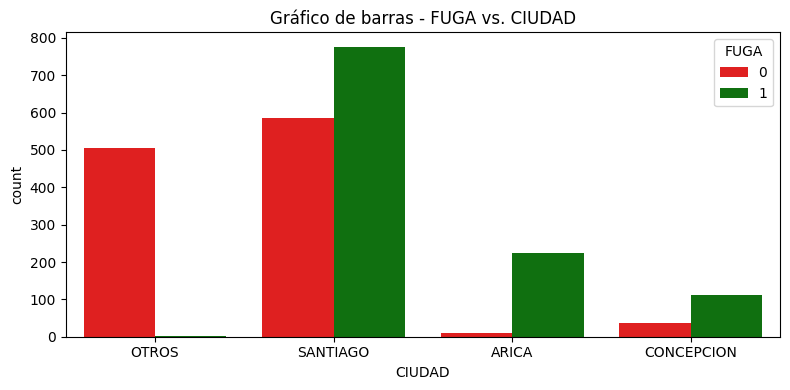

In [ ]:
color = ['red', 'green']
fig, axarr = plt.subplots(1, 1, figsize=(8, 4))
sn.countplot(x='CIUDAD', hue='FUGA', data=df, ax=axarr, palette=color)
axarr.set_title('Gráfico de barras - FUGA vs. CIUDAD')
plt.tight_layout()
plt.show()

In [ ]:
# dado que la oficina parece ser un factor más relevante que la ciudad, eliminamos la columna ciudad
# df = df.drop('CIUDAD', axis=1)

In [ ]:
df_c = df.copy()
ciudad= analisis_matriz_contingencia_count(df_c['NIV_EDUC'], df_c['FUGA'])
ciudad.sort_values(by='Total', ascending=False).head(10)

FUGA,0,1,Total
NIV_EDUC,,,
Total,1135,1115,2250
UNV,209,719,928
TEC,557,134,691
MED,350,259,609
EUN,12,0,12
BAS,7,3,10


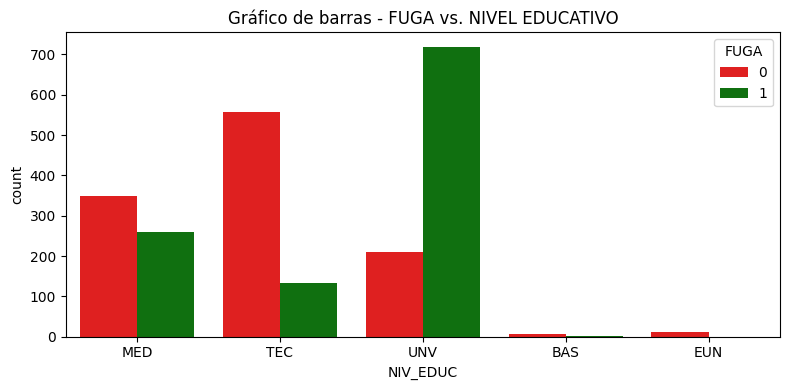

In [ ]:
color = ['red', 'green']
fig, axarr = plt.subplots(1, 1, figsize=(8, 4))
sn.countplot(x='NIV_EDUC', hue='FUGA', data=df, ax=axarr, palette=color)
axarr.set_title('Gráfico de barras - FUGA vs. NIVEL EDUCATIVO')
plt.tight_layout()
plt.show()

In [ ]:
df_c = df.copy()
ciudad= analisis_matriz_contingencia_count(df_c['E_CIVIL'], df_c['FUGA'])
ciudad.sort_values(by='Total', ascending=False).head(10)

FUGA,0,1,Total
E_CIVIL,,,
Total,1135,1115,2250
CAS,562,844,1406
SOL,436,198,634
SEP,53,60,113
VIU,84,13,97


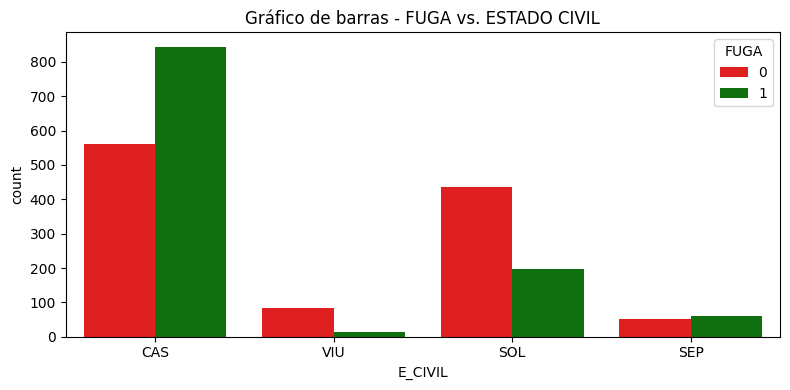

In [ ]:
color = ['red', 'green']
fig, axarr = plt.subplots(1, 1, figsize=(8, 4))
sn.countplot(x='E_CIVIL', hue='FUGA', data=df, ax=axarr, palette=color)
axarr.set_title('Gráfico de barras - FUGA vs. ESTADO CIVIL')
plt.tight_layout()
plt.show()

In [ ]:
df_c = df.copy()
ciudad= analisis_matriz_contingencia_count(df_c['GENERO'], df_c['FUGA'])
ciudad.sort_values(by='Total', ascending=False).head(10)

FUGA,0,1,Total
GENERO,,,
Total,1135,1115,2250
1,421,939,1360
0,714,176,890


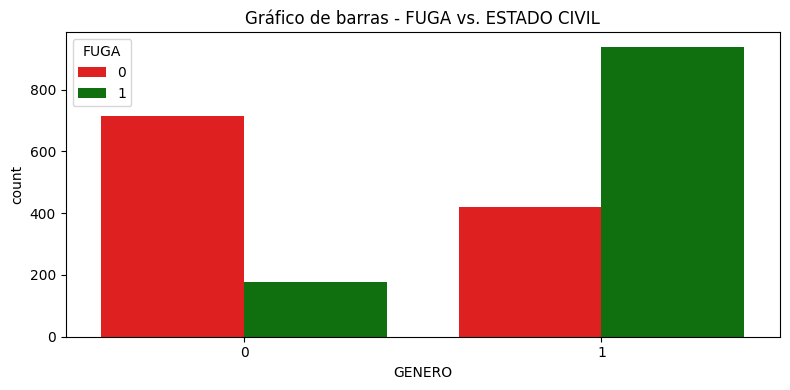

In [ ]:
color = ['red', 'green']
fig, axarr = plt.subplots(1, 1, figsize=(8, 4))
sn.countplot(x='GENERO', hue='FUGA', data=df, ax=axarr, palette=color)
axarr.set_title('Gráfico de barras - FUGA vs. ESTADO CIVIL')
plt.tight_layout()
plt.show()

Al revisar los gráficos, nuestras primeras impresiones sobre los clientes que tienden a fugarse:

Poseen estudios universitarios.
* Son casados.
* Son hombres.
* No tienen seguro de desgravamen.

En cambio, los más fieles (no se fugan):
* Poseen estudios técnicos.
* Son solteros o viudos.
* Son mujeres.

In [ ]:
# Ejecutamos dummies a la variables Categoricas para crear las variables por separados
df = pd.get_dummies(data=df,columns=['CIUDAD','NIV_EDUC','E_CIVIL'])
# df = pd.get_dummies(data=df,columns=['NIV_EDUC','E_CIVIL'])
df.sample(10)

,GENERO,RENTA,EDAD,COD_OFI,COD_COM,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,...,CIUDAD_SANTIAGO,NIV_EDUC_BAS,NIV_EDUC_EUN,NIV_EDUC_MED,NIV_EDUC_TEC,NIV_EDUC_UNV,E_CIVIL_CAS,E_CIVIL_SEP,E_CIVIL_SOL,E_CIVIL_VIU
1302,1,425360,54,57,105,0,424914,0,1978,38,...,1,0,0,0,0,1,0,0,1,0
1224,1,620304,49,144,86,0,451667,0,671619,847,...,1,0,0,0,0,1,0,0,1,0
2264,0,1790030,56,13,16,763753,67009,0,2551030,6731,...,0,0,0,0,0,1,1,0,0,0
1037,1,26094,41,55,90,211999,97398,0,174660,304,...,1,0,0,0,0,1,1,0,0,0
198,1,560802,40,138,1,0,258590,0,0,87,...,0,0,0,0,0,1,1,0,0,0
517,0,342751,36,101,87,0,806562,0,0,441,...,1,0,0,1,0,0,1,0,0,0
568,0,583304,32,75,79,0,204173,0,0,0,...,0,0,0,0,1,0,1,0,0,0
775,1,285989,45,31,119,45324,79095,0,262740,164,...,1,0,0,0,0,1,0,0,1,0
1655,0,945133,41,27,226,0,162391,0,99955,204,...,0,0,0,0,0,1,1,0,0,0
1880,1,188117,45,31,119,0,993779,0,305985,3,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
# Podemos generar una nueva columna (DEUDA_TOTAL) con la suma de las deudas por registro
mesesdeudas = ['D_Marzo','D_Abril','D_Mayo','D_Junio','D_Julio','D_Agosto','D_Septiembre']
df['DEUDA_TOTAL'] = df[mesesdeudas].sum(axis=1)

In [ ]:
# Podemos generar una nueva columna (PROM_MONTO_RENTA) con el promedio entre el monto preaprobado y la renta del cliente
# df['PROM_MONTO_RENTA'] = df['MONTO']/df['RENTA']

In [ ]:
# Como vemos el valor de la cantidad de variables incremento de 19 a 21 con la nueva columna DEUDA_TOTAL
df.shape

(2250, 30)

# Normalización

### Por ultimo realizaremos las normalizacion  de los datos aplicando transformaciones para ayudar a mejorar la calidad del modelo, reducir el sesgo, facilitar la interpretación y mejorar el rendimiento general del algoritmo de aprendizaje automático

In [ ]:
# Veamos los datos continuos existente en dataset.
columns_int = []
for column in df:
    if df[column].dtypes == 'int64' or df[column].dtypes == 'float64':
        columns_int.append(column)

df_continuos = df[columns_int].copy()
df_continuos

,GENERO,RENTA,EDAD,COD_OFI,COD_COM,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA,DEUDA_TOTAL
0,1,746476,39,68,213,0,38292,0,434357,1766,9110,340,2,2000000,0,0,483865
1,0,11901,49,16,89,0,0,0,0,48,0,0,1,7500000,1,0,48
2,1,1651421,39,90,16,0,604169,0,0,323,26489,2925,1,8000000,0,0,633906
3,0,638969,36,85,115,0,5125,0,198998,94,0,105,1,2600000,0,0,204322
4,1,860113,44,45,80,0,11946,0,73959,149,0,272,1,6400000,0,0,86326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,0,205041,43,82,108,0,1107,0,643303,4014,2431,138,3,1100000,1,0,650993
2290,1,70335,54,27,226,0,261891,0,1008519,2,0,170,1,1800000,0,1,1270582
2291,1,725881,51,138,1,729256,0,0,0,1645,0,0,1,4200000,0,1,730901
2292,1,4034859,42,55,90,0,406679,0,257251,37,1606,173,2,4600000,0,1,665746


Podemos observar que las variables tienen proporciones muy marcadas o están en escalas diferentes. Esto puede provocar los siguientes problemas:

* Puede llevar a un sesgo en la predicción.
* En algoritmos que utilizan métodos de optimización numérica, como la regresión logística o las redes neuronales, las diferencias en la escala de las variables pueden llevar a problemas de convergencia y hacer que el entrenamiento del modelo sea más lento o menos estable,
* Para los algoritmos basados en distancias, como el k-Nearest Neighbors (k-NN) y el Support Vector Machine (SVM), pueden verse afectados por la escala de las variables.
* Puede ser difícil interpretar los coeficientes del modelo y comparar el impacto relativo de cada variable.

In [ ]:
# Despues de ver las disparidad de las escalas decidimos aplicar el metodo de MinMaxScaler para normalizar los datos
np.random.seed(461)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

El uso de MinMaxScaler es particularmente útil cuando las características tienen diferentes escalas o rangos y se desea llevar todas las características al mismo rango para que tengan igual importancia en el modelo. Algunos algoritmos, como los basados en distancias (k-NN, SVM, etc.) y los que utilizan métodos de gradiente, pueden beneficiarse del escalado de características para mejorar la convergencia y el rendimiento del modelo

In [ ]:
#Visualizamos los datos despues de la transformacion
df.head(10)

,GENERO,RENTA,EDAD,COD_OFI,COD_COM,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,...,NIV_EDUC_BAS,NIV_EDUC_EUN,NIV_EDUC_MED,NIV_EDUC_TEC,NIV_EDUC_UNV,E_CIVIL_CAS,E_CIVIL_SEP,E_CIVIL_SOL,E_CIVIL_VIU,DEUDA_TOTAL
0,1.0,0.088276,0.390244,0.438710,0.411650,0.000000,0.006968,0.0,0.021050,0.157862,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.022904
1,0.0,0.001387,0.634146,0.103226,0.170874,0.000000,0.000000,0.0,0.000000,0.004291,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000002
2,1.0,0.195318,0.390244,0.580645,0.029126,0.000000,0.109938,0.0,0.000000,0.028873,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.030006
3,0.0,0.075560,0.317073,0.548387,0.221359,0.000000,0.000933,0.0,0.009644,0.008403,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.009672
4,1.0,0.101718,0.512195,0.290323,0.153398,0.000000,0.002174,0.0,0.003584,0.013319,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.004086
5,1.0,0.038950,0.414634,0.341935,0.176699,0.000000,0.034126,0.0,0.000582,0.057299,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.009489
6,1.0,0.003378,0.536585,0.354839,0.172816,0.059206,0.096934,0.0,0.000000,0.130866,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.052602
7,0.0,0.001347,0.439024,0.303226,0.215534,0.000000,0.025715,0.0,0.025458,0.001162,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.031578
8,0.0,0.360104,0.243902,0.141935,0.000000,0.000000,0.018575,0.0,0.000000,0.003933,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.004834
9,0.0,0.429675,0.390244,0.174194,0.170874,0.000000,0.029598,0.0,0.021609,0.077322,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.028890


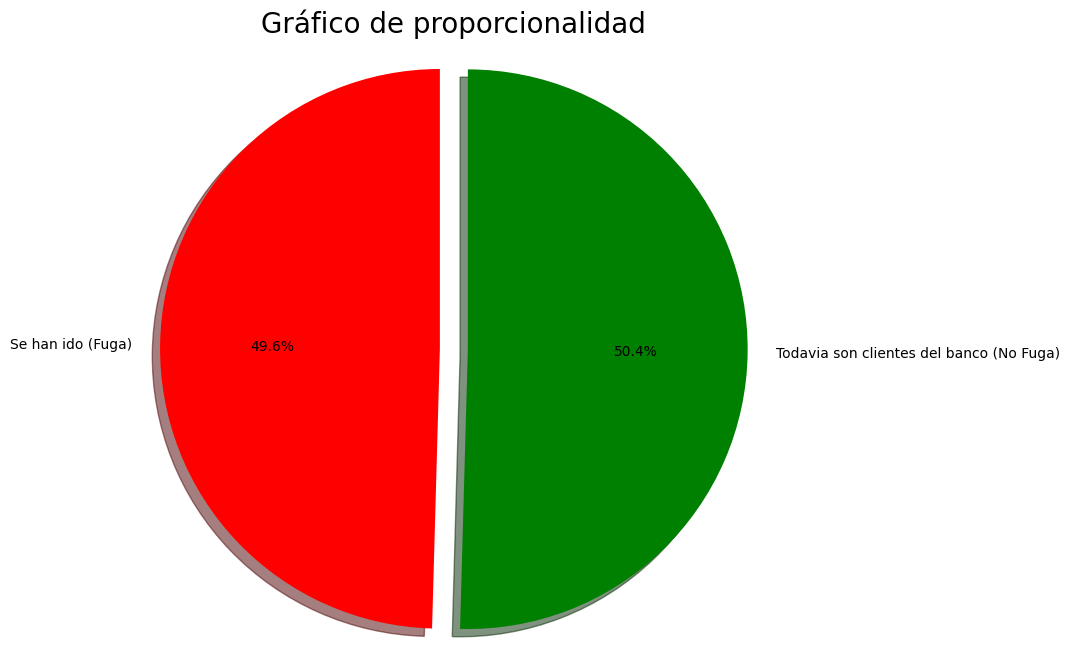

In [ ]:
# Verificamos si el dataset esta balanceado y mostramos un grafico de proporcionalidad
labels = 'Se han ido (Fuga)', 'Todavia son clientes del banco (No Fuga)'
sizes = [df.FUGA[df['FUGA']==1].count(),df.FUGA[df['FUGA']==0].count()]
explode = (0, 0.1)
color=['red','green']
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, colors=color, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Gráfico de proporcionalidad", size = 20)
plt.show()

In [ ]:
# Despues de todas las transformaciones visualizamos la cantidad de variables que obtuvimos para utilizar en los modelos
df.shape

(2250, 30)

# Matriz de correlación tipo mapa de calor (heatmap en inglés) :

En un mapa de calor de matriz de correlación, generalmente se utilizan colores que van desde tonos fríos (como azules) para representar correlaciones negativas, pasando por blanco para representar una correlación nula, hasta tonos cálidos (como rojos) para representar correlaciones positivas. De esta manera, es fácil identificar visualmente cómo se relacionan las variables entre sí.

<Axes: >

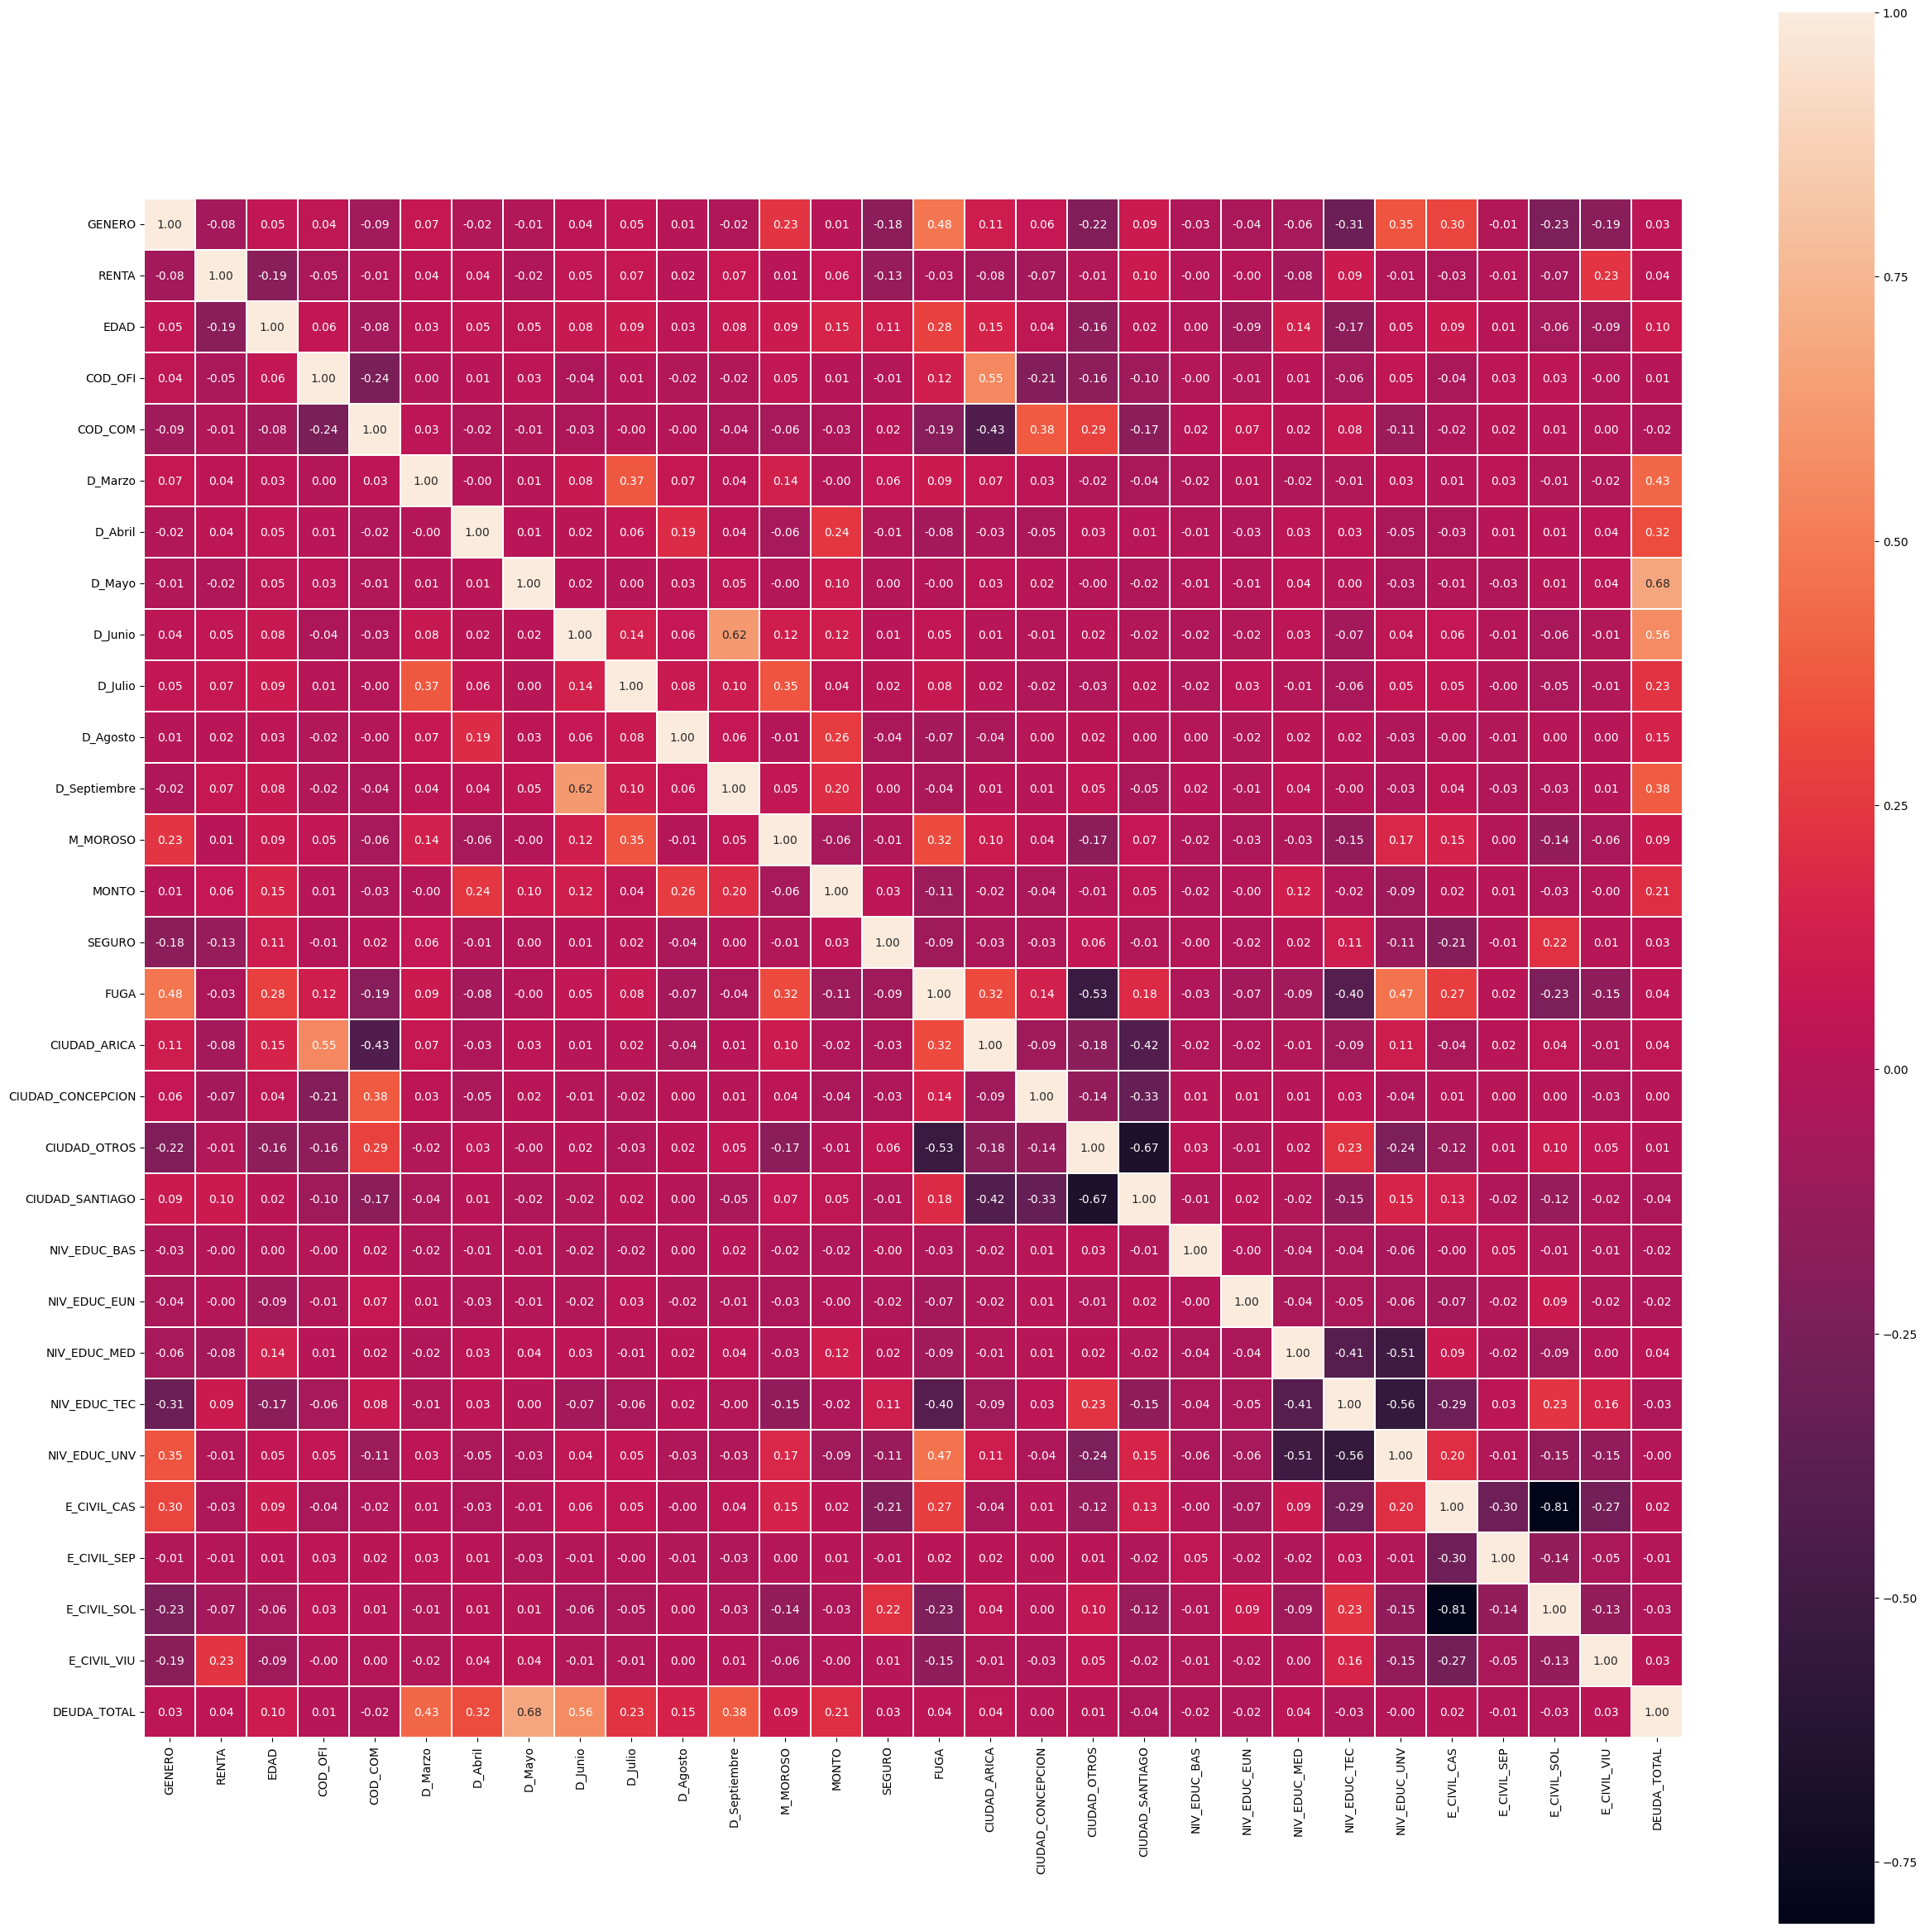

In [ ]:
#Verificamos que estan balanceadas por lo que se pueden usar todas
plt.figure(figsize=(30,30))
correlation_mat = df.corr()
sn.heatmap(correlation_mat, annot = True, fmt=".2f", linewidths=.2, square = True)

# Entrenamientos de modelos.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
import tensorflow as tf
score_model = []
epochs = 25

#Separamos el dataframe de los datos de entrenamiento con respecto a la variable objetivo.
y = df['FUGA']
X = df.drop('FUGA', axis='columns')

X_split_train, X_split_test, y_split_train, y_split_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Curva ROC (Receiver Operating Characteristic)
# (FPR) tasas de falsos positivos
# (TPR) tasas de verdaderos positivos

def graphic_roc(model, X_test, y_test):

    y_predict = model.predict(X_test)
    y_predict_prob = model.predict_proba(X_test)[:,1]

    auc_score = roc_auc_score(y_test, y_predict);
    fpr_df, tpr_df, _ = roc_curve(y_test, y_predict_prob)

    plt.figure(figsize = (12,6), linewidth= 1)
    plt.plot(fpr_df, tpr_df, label = 'Score: {:.2f}% '.format(auc_score))
    plt.title('Curva ROC')
    plt.legend(loc='best')
    plt.show()

In [ ]:
# Modelo K Vecinos mas Cercanos
# Evaluamos el valor de vecinos mas optimo para el entrenamiento del modelo.
np.random.seed(461)
from sklearn.neighbors import KNeighborsClassifier

best_score = 0
best_k = None
for k in range(1, 31):
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn_classifier, X_split_train, y_split_train, cv=5)  # Validación cruzada con 5 folds
  mean_score = np.mean(scores)
  if mean_score > best_score:
    best_score = mean_score
    best_k = k
print("Mejor valor de k:", best_k)
print("Mejor puntuación:", best_score)

Mejor valor de k: 10
Mejor puntuación: 0.8972222222222221


In [ ]:
# Modelo K Vecinos mas Cercanos
np.random.seed(461)

knn_classifier = KNeighborsClassifier(n_neighbors=11)
knn_classifier.fit(X_split_train, y_split_train)
score = knn_classifier.score(X_split_test, y_split_test)
score_model.append(score)
print('SCORE: %.2f' % (score_model[0]))

SCORE: 0.89


Text(45.722222222222214, 0.5, 'Truth')

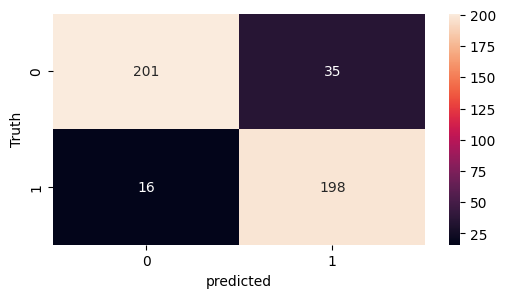

In [ ]:
y_predict = knn_classifier.predict(X_split_test)
model_data = tf.math.confusion_matrix(labels=y_split_test,predictions=y_predict)
plt.figure(figsize=(6,3))
sn.heatmap(model_data, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

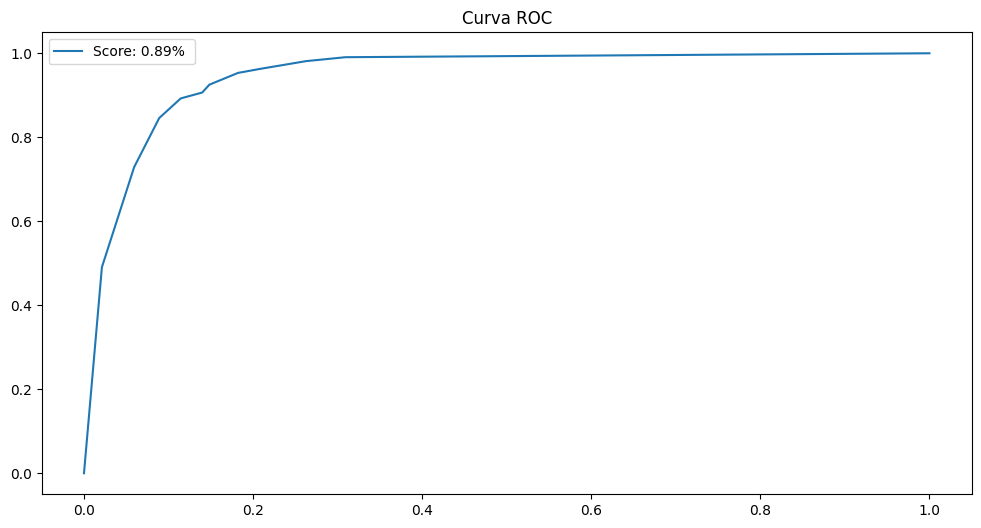

In [ ]:
graphic_roc(knn_classifier, X_split_test, y_split_test)

In [ ]:
# Modelo Arbol de Decision
np.random.seed(461)
from sklearn import tree

tree_classifier = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
tree_classifier.fit(X_split_train, y_split_train)
score = tree_classifier.score(X_split_test, y_split_test)
score_model.append(score)
print('SCORE: %.2f' % (score_model[1]))

SCORE: 0.91


Text(45.722222222222214, 0.5, 'Truth')

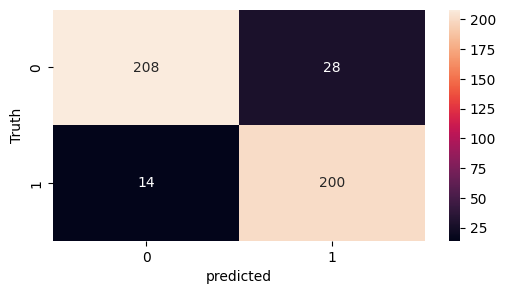

In [ ]:
y_predict = tree_classifier.predict(X_split_test)
model_data = tf.math.confusion_matrix(labels=y_split_test,predictions=y_predict)
plt.figure(figsize=(6,3))
sn.heatmap(model_data, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

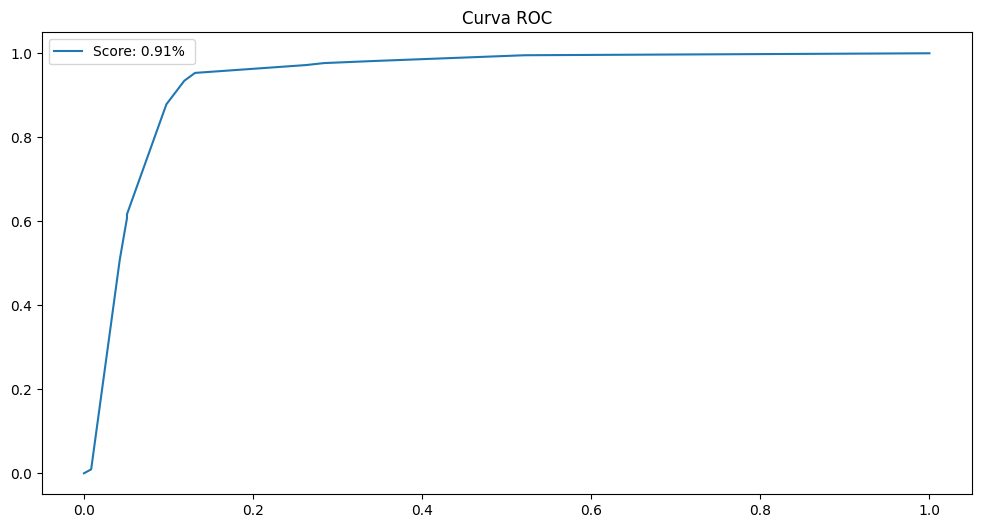

In [ ]:
graphic_roc(tree_classifier, X_split_test, y_split_test)

In [ ]:
# Modelo Random Forest Classifier
np.random.seed(461)
from sklearn.ensemble import RandomForestClassifier

RF_Classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=10, random_state = 7)
RF_Classifier.fit(X_split_train, y_split_train)
score = RF_Classifier.score(X_split_test, y_split_test)
score_model.append(score)
print('SCORE: %.2f' % (score_model[2]))

SCORE: 0.92


Text(45.722222222222214, 0.5, 'Truth')

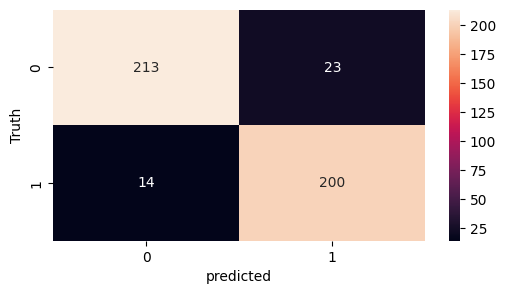

In [ ]:
y_predict = RF_Classifier.predict(X_split_test)
model_data = tf.math.confusion_matrix(labels=y_split_test,predictions=y_predict)
plt.figure(figsize=(6,3))
sn.heatmap(model_data, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

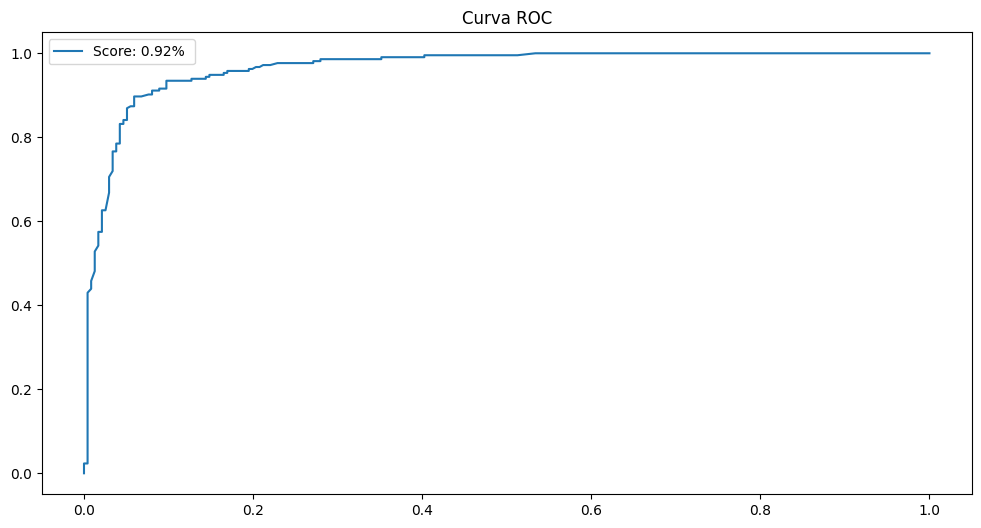

In [ ]:
graphic_roc(RF_Classifier, X_split_test, y_split_test)

In [ ]:
# Modelo Redes Neuronales
np.random.seed(461)
redneuronal = tf.keras.Sequential([
    tf.keras.layers.Dense(16,  kernel_initializer = 'uniform', input_shape=(df.shape[1]-1,), activation='relu'),
    tf.keras.layers.Dense(4,  kernel_initializer = 'uniform', activation='relu'),
    tf.keras.layers.Dense(1,  kernel_initializer = 'uniform', activation='sigmoid'),
])
redneuronal.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

redneuronal.fit(X_split_train, y_split_train, epochs=epochs, validation_data = (X_split_test, y_split_test))
score = redneuronal.evaluate(X_split_test, y_split_test, verbose=1)[1]
score_model.append(score)
print('SCORE: %.2f' % (score_model[3]))

Epoch 1/25
57/57 [==============================] - 1s 7ms/step - loss: 0.6914 - accuracy: 0.6050 - val_loss: 0.6855 - val_accuracy: 0.8356
Epoch 2/25
57/57 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.8156 - val_loss: 0.6189 - val_accuracy: 0.8356
Epoch 3/25
57/57 [==============================] - 0s 3ms/step - loss: 0.5571 - accuracy: 0.8494 - val_loss: 0.4846 - val_accuracy: 0.8556
Epoch 4/25
57/57 [==============================] - 0s 3ms/step - loss: 0.4275 - accuracy: 0.8756 - val_loss: 0.3800 - val_accuracy: 0.8756
Epoch 5/25
57/57 [==============================] - 0s 3ms/step - loss: 0.3452 - accuracy: 0.8828 - val_loss: 0.3321 - val_accuracy: 0.8911
Epoch 6/25
57/57 [==============================] - 0s 3ms/step - loss: 0.3068 - accuracy: 0.8906 - val_loss: 0.3121 - val_accuracy: 0.8911
Epoch 7/25
57/57 [==============================] - 0s 3ms/step - loss: 0.2884 - accuracy: 0.8983 - val_loss: 0.3051 - val_accuracy: 0.8867
Epoch 8/25
57/57 [==

15/15 [==============================] - 0s 2ms/step


Text(45.722222222222214, 0.5, 'Truth')

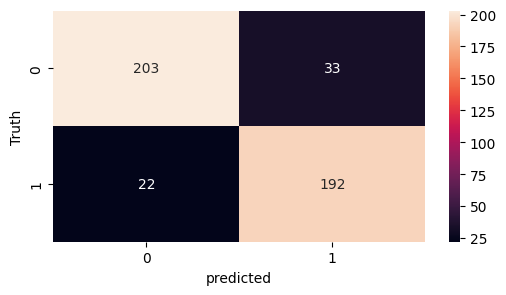

In [ ]:
alpha= 0.5
model_predict  = redneuronal.predict(X_split_test)
y_predict = []
for element in model_predict :
    if element > alpha:
        y_predict.append(1)
    else:
        y_predict.append(0)

model_data = tf.math.confusion_matrix(labels=y_split_test,predictions=y_predict)
plt.figure(figsize=(6,3))
sn.heatmap(model_data, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

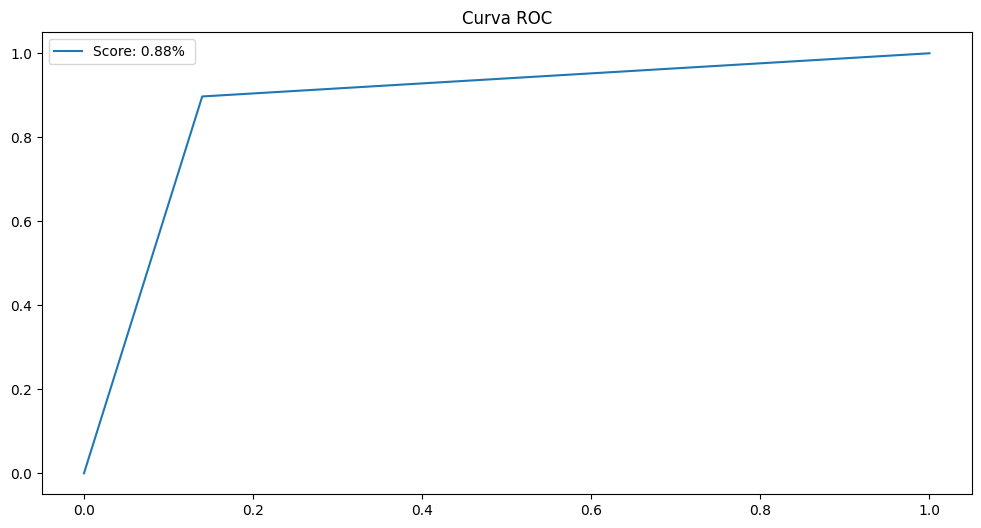

In [ ]:
# Curva ROC (Receiver Operating Characteristic)
# (FPR) tasas de falsos positivos
# (TPR) tasas de verdaderos positivos

auc_score = roc_auc_score(y_split_test, y_predict);
fpr_df, tpr_df, _ = roc_curve(y_split_test, y_predict)

plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_df, tpr_df, label = 'Score: {:.2f}% '.format(auc_score))
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

In [ ]:
Model_Comparison = pd.DataFrame({
    'Model': [
                'K-Nearest Neighbor',
                'Decision Tree',
                'Random Forest',
                'Red Neuronal'
             ],
    'Score': [
                score_model[0],
                score_model[1],
                score_model[2],
                score_model[3]
            ]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,0.917778,Random Forest
1,0.906667,Decision Tree
2,0.886667,K-Nearest Neighbor
3,0.877778,Red Neuronal
